In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 134985 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
os.chdir('drive/Tensorflow/Keras_API')

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [0]:
from tensorflow.keras import  Sequential
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import InputLayer, Input, Reshape, MaxPool2D, Conv2D, Dense, Flatten, Activation, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D 
from tensorflow.keras import regularizers, optimizers
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt 

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
img_size= 28

img_size_flat= img_size* img_size



In [0]:
#Plot the correct images
def plot_images(images,cls_true, cls_pred=None):
    plt.figure(figsize=(5,5))

    for i in range(min(9, len(images))):
        plt.subplot(3,3,i+1)

        if cls_pred is None:
            plt.xlabel('True: {0}'.format(cls_true[i]))
        else:
            plt.xlabel('True: {0}, Pred: {0}'.format(cls_true[i], cls_pred))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
    plt.show()



In [0]:
#Plot the incorrect predictions function
def plot_incorrect_imagers(images,cls_true, cls_pred):
    plt.figure(figsize=(5,5))

    incorrect= cls_true != cls_pred
    incorret_images=images[incorrect]
    
    plot_images(incorret_images,cls_true[incorrect],cls_pred[incorrect]  )

In [0]:
# Load data fuction
def load_data():
    from tensorflow.examples.tutorials.mnist import input_data
    data=input_data.read_data_sets('data/MNIST/', one_hot=True)

    X_train=np.asarray(data.train.images.reshape(-1, img_size, img_size))
    y_train=np.asarray(data.train.labels)

    X_test=np.asarray(data.test.images.reshape(-1, img_size, img_size))
    y_test=np.asarray(data.test.labels)

    y_train_cls=np.argmax(y_train, axis=1)
    y_test_cls=np.argmax(y_test, axis=1)

    return X_train, y_train, X_test, y_test, y_train_cls, y_test_cls
    


In [30]:
#Load data from mnist
X_train, y_train, X_test, y_test, y_train_cls, y_test_cls=load_data()

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [27]:
y_train_cls

array([7, 3, 4, ..., 5, 6, 8])

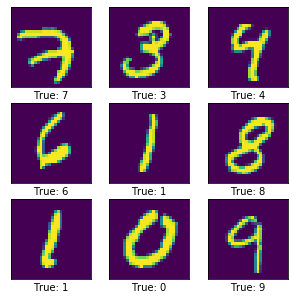

In [34]:
#Plot the images
plot_images(X_train,y_train_cls)

In [0]:
#Nomalize the data
X_train=X_train/255
X_test=X_test/255

In [0]:

def imgModel(img_size):

    X_input=Input(shape=(img_size, img_size))

    #Reshape the inpuit
    net=Reshape((img_size, img_size, 1))(X_input)
    # First convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)

    # Second convolutional layer with ReLU-activation and max-pooling.
    net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)
    net = MaxPooling2D(pool_size=2, strides=2)(net)

    # Flatten the output of the conv-layer from 4-dim to 2-dim.
    net = Flatten()(net)

    # First fully-connected / dense layer with ReLU-activation.
    net = Dense(128, activation='relu')(net)

    # Last fully-connected / dense layer with softmax-activation
    # so it can be used for classification.
    net = Dense(10, activation='softmax')(net)
    outputs = net
    
    model= Model(inputs=X_input, outputs=outputs)  
    return model


In [48]:
model=imgModel(img_size)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [59]:
history=model.fit(X_train, y_train, batch_size=256, epochs=8, validation_data=(X_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0154 - acc: 0.9951 - val_loss: 0.0344 - val_acc: 0.9896
Epoch 2/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0147 - acc: 0.9954 - val_loss: 0.0364 - val_acc: 0.9886
Epoch 3/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0334 - val_acc: 0.9891
Epoch 4/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0311 - val_acc: 0.9904
Epoch 5/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0086 - acc: 0.9973 - val_loss: 0.0303 - val_acc: 0.9911
Epoch 6/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0310 - val_acc: 0.9912
Epoch 7/8
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0340 - 

In [57]:
#Test accuracy and test value
testloss, testacc=model.evaluate(X_test, y_test)
print('Test accuracy: {0:.0%}, Test loss: {0:.2f}'.format(testacc, testloss))

10000/10000 [==============================] - 4s 432us/sample - loss: 0.0314 - acc: 0.9898
Test accuracy: 99%, Test loss: 0.99


In [0]:
def plot_acc_loss(history):

    #Plot accuracy
    plt.figure(figsize=(10,10))
    plt.plot(history.history['acc'], label='Training Acuracy')
    plt.plot(history.history['val_acc'], label='Test Acuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

    #Plot loss 
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()


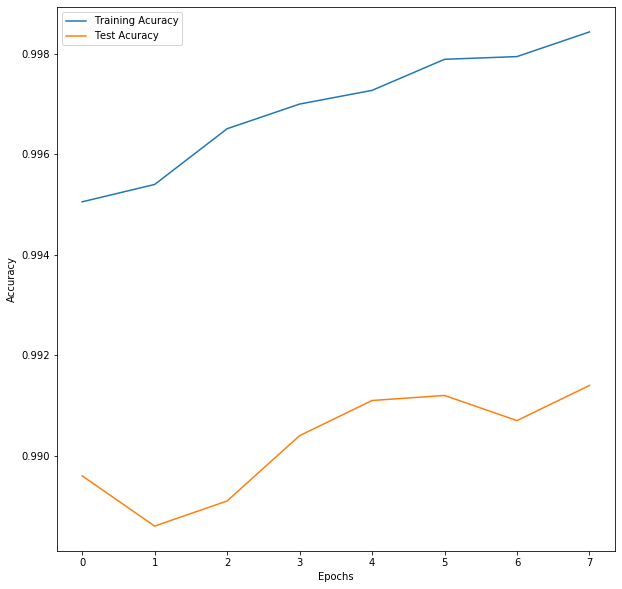

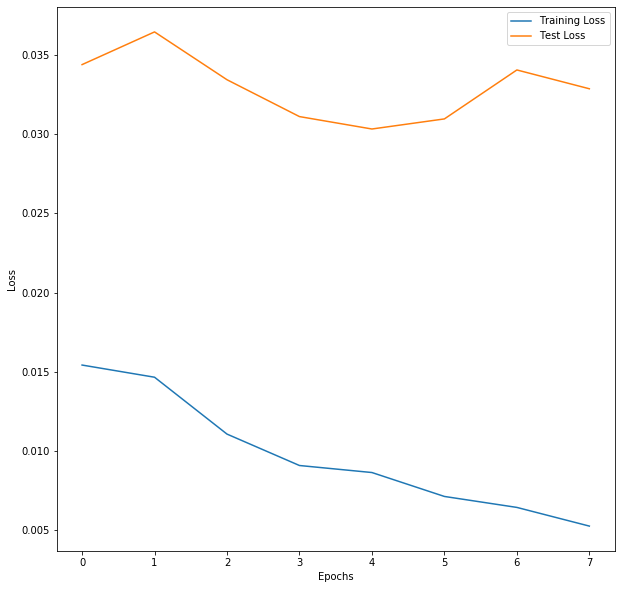

In [68]:
plot_acc_loss(history)